# Robustic techniques to play with outliers!

## 5 Ways to intrepret it 😉
### 1. Isolation forest <br> 2. Z score <br> 3. Box plot & IQR <br> 4. Mahalanobis' distance <br> 5. Cook's distance

### Outliers :
*Basically outliers are the points which seemlessly different from it's neighbours right*<br>
*Outliers are often called the most extreme ones , it can occurs due to some abnormal behaviours or due to some error in data acquisition process*<br>
*Outliers really cause problems in modelling the ML algorithm so it was always encouraged to take some premeasures to deal woth the outlilers*<br>

In [274]:
#importing prerequisities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import IsolationForest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

## 1.) Isolation Forest

*The name itself describes that it is more similar to the most famous Random forest algorithm , likewise it too implements varios decision tress ..*<br>
*the main idea is to make as many splits in the data to separate a point(single) -> the points which are taking vey minimal splits are considered as outliers*
<br>(OR)
<br>
*The minimal path to reach the leaf node from the root node in the decision tree is often termed as outliers*

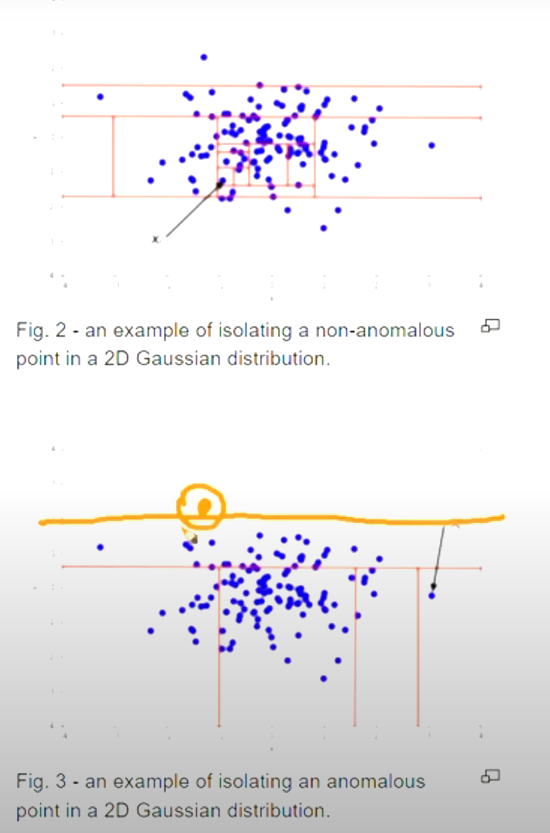

In [33]:
# let us load the livelihood dataset
lil = pd.read_excel(r"C:\Users\navab\Downloads\livelihood_filtered.xlsx")

In [34]:
lil.head(3)

,Unnamed: 0,Indicators,Mean Household Size1,0-14 Years of Household population (%),15-44 Years of Household population (%),45-59 Years of Household population (%),60-69 Years of Household population (%),70-79 Years of Household population (%),80+ Years of Household population (%),60-74 Years of Household population (%),...,Any aid or supportive device using (%)74,Spectacles/Contact lenses using (%)75,Walker/Walking stick using (%)75,Prevalence of depression based on CIDI-SF (%)78,Underweight by Anthropometric Indicators (%)88,Overweight by Anthropometric Indicators (%)88,Obesity by Anthropometric Indicators (%)88,Type of Facility Visited during the Last Hospitalization in the Past 12 Months by Public facility (%)92,Type of Facility Visited during the Last Hospitalization in the Past 12 Months by Private facility (%)93,Mean expenditure on last out-patient visitin the Past 12 Months by Type of Facilities Visited (in INR) 97
0,0,INDIA,5.7,26.7,48.0,12.6,7.4,3.7,1.7,9.7,...,36.2,33.0,4.1,7.70,20.6,20.7,7.4,35.1,62.4,1239
1,1,Andaman & Nicobar Islands,5.3,22.7,51.1,13.9,7.6,3.2,1.5,9.4,...,40.1,37.7,3.0,1.40,10.6,30.0,11.3,83.2,16.8,936
2,2,Andhra Pradesh,4.6,22.0,47.1,16.4,9.4,3.7,1.4,11.8,...,40.2,37.4,4.2,3.92,11.1,30.4,12.8,24.7,74.8,2000


In [59]:
#selecting only the numeric cols to find the abnormalities
X_train = lil.select_dtypes(include='int')

In [60]:
X_train.head()

,Unnamed: 0,Sex Ratio (Females per 1000 Males ) All ages,Sex Ration (Females per 1000 Males) 60 + population,Agricultural and allied activities21,Non-agricultural business activities22,Wage and salary workers23,Mean expenditure on last out-patient visitin the Past 12 Months by Type of Facilities Visited (in INR) 97,is_outlier
0,0,984,1065,5117,9119,10996,1239,-1
1,1,998,932,8555,16277,27660,936,-1
2,2,1029,1037,5775,10629,8873,2000,-1
3,3,980,817,6556,13517,21213,8581,-1
4,4,1022,1072,4962,7356,10699,1994,-1


In [61]:
iso = IsolationForest(n_jobs = 6 , contamination = 0.01)
iso.fit(X_train)

C:\Users\navab\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, n_jobs=6)

In [62]:
np.unique(iso.predict(X_train),return_counts = True)

(array([-1,  1]), array([ 1, 36], dtype=int64))

In [63]:
lil['is_outlier'] = iso.predict(X_train)*-1

In [65]:
lil[lil['is_outlier'] == 1].select_dtypes('int')

,Unnamed: 0,Sex Ratio (Females per 1000 Males ) All ages,Sex Ration (Females per 1000 Males) 60 + population,Agricultural and allied activities21,Non-agricultural business activities22,Wage and salary workers23,Mean expenditure on last out-patient visitin the Past 12 Months by Type of Facilities Visited (in INR) 97,is_outlier
30,30,984,838,21943,36586,22794,1994,1


In [66]:
X_train.describe()

,Unnamed: 0,Sex Ratio (Females per 1000 Males ) All ages,Sex Ration (Females per 1000 Males) 60 + population,Agricultural and allied activities21,Non-agricultural business activities22,Wage and salary workers23,Mean expenditure on last out-patient visitin the Past 12 Months by Type of Facilities Visited (in INR) 97,is_outlier
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,18.000000,987.972973,1072.648649,6444.513514,11778.837838,15571.270270,1840.189189,-0.945946
std,10.824355,68.658772,135.652378,3229.448944,5028.571807,6149.729112,1495.099269,0.328798
min,0.000000,774.000000,817.000000,3286.000000,7216.000000,6993.000000,655.000000,-1.000000
25%,9.000000,968.000000,986.000000,4774.000000,9028.000000,10383.000000,1087.000000,-1.000000
50%,18.000000,995.000000,1067.000000,5384.000000,10629.000000,15020.000000,1370.000000,-1.000000
75%,27.000000,1025.000000,1151.000000,6556.000000,13376.000000,18549.000000,2004.000000,-1.000000
max,36.000000,1113.000000,1464.000000,21943.000000,36586.000000,31300.000000,8581.000000,1.000000


In [67]:
lil[lil['is_outlier'] == 1]

,Unnamed: 0,Indicators,Mean Household Size1,0-14 Years of Household population (%),15-44 Years of Household population (%),45-59 Years of Household population (%),60-69 Years of Household population (%),70-79 Years of Household population (%),80+ Years of Household population (%),60-74 Years of Household population (%),...,Spectacles/Contact lenses using (%)75,Walker/Walking stick using (%)75,Prevalence of depression based on CIDI-SF (%)78,Underweight by Anthropometric Indicators (%)88,Overweight by Anthropometric Indicators (%)88,Obesity by Anthropometric Indicators (%)88,Type of Facility Visited during the Last Hospitalization in the Past 12 Months by Public facility (%)92,Type of Facility Visited during the Last Hospitalization in the Past 12 Months by Private facility (%)93,Mean expenditure on last out-patient visitin the Past 12 Months by Type of Facilities Visited (in INR) 97,is_outlier
30,30,Sikkim **,4.2,16.7,57.0,13.8,6.4,4.6,1.6,8.7,...,16.9,4.5,0.61,4.7,32.8,7.5,50.2,46.7,1994,1


### Sikkim is different from others ! 🤔
Thus by the result of isolation forest model we can intrepret that there is some abnormalities exiting in Sikkim !

------------------------------------------------------------------------------------------------------------------------

## 2.) Z-Score analysis

* -> Z-score analysis is one of the way for finding the abnormalities in  univariate features <br>
-> initially need to calculate mean , std and z_score = (x-mean)/std <br>
-> Z-score follows standard normal distribution of data which looks like a bell shaped curve uniformly distributed over the intervals(percentiles)<br>
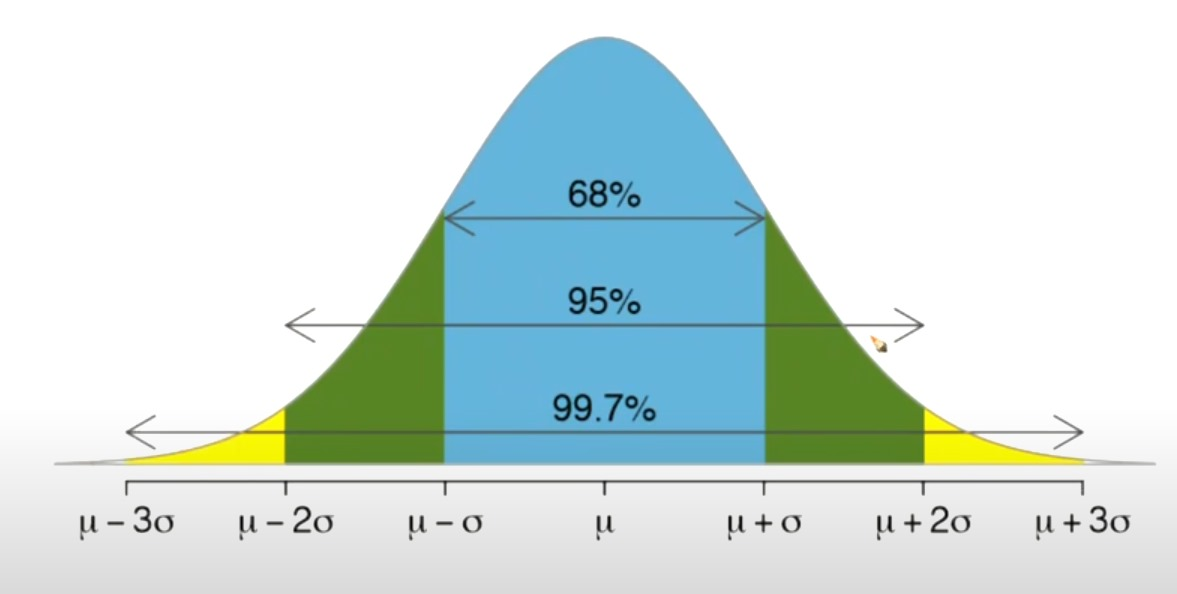

here we label the data points as outliers those are lie above the spread of > 99.7% <br>
that is the z_score <-3 && z_score > 3 are labelled as outliers...

In [116]:
#lets load credit scores data
cs = pd.read_csv(r"C:\Users\navab\Downloads\map_data_CRC.csv")

In [117]:
cs.head()

,state,value
0,1,0.056909
1,2,-0.142430
2,4,0.053814
3,5,-0.083650
4,6,0.067109


In [118]:
#lets do some numpy games
m = np.nanmean(cs.value)
std = np.nanstd(cs.value)

cs['z_score'] = (cs.value - m)/std

<Axes: ylabel='Frequency'>

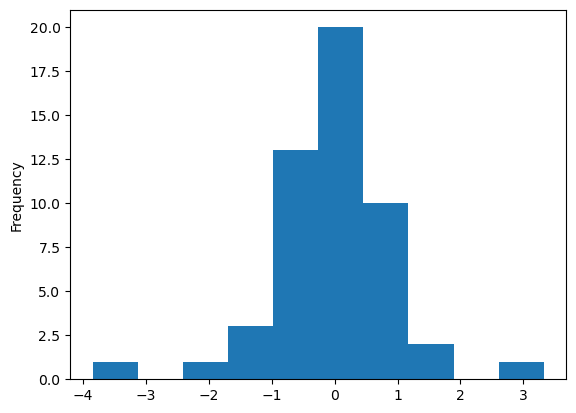

In [119]:
cs['z_score'].plot(kind='hist')

In [120]:
#here we can see visually there some ones who are behaving different from otherss..

In [121]:
#outliers
cs[(cs['z_score']>3 )|(cs['z_score']< -3)]

,state,value,z_score
26,30,0.463621,3.322169
48,54,-0.503261,-3.838514


In [122]:
cs.value.describe()

count    51.000000
mean      0.015040
std       0.136370
min      -0.503261
25%      -0.053755
50%       0.022196
75%       0.073623
max       0.463621
Name: value, dtype: float64

So far we have seen methods to find the outlier but not how to solve them right <br>
Time for 🤞.<br>
### Ways of Dealing Outliers
<br> 1.) Dropping <br> 2.) Capping <br> 3.) Imputing (MICE).

In [123]:
# 1.) Dropping..

cs_drop_out = cs[(cs['z_score']<=3 )|(cs['z_score']>=-3)]

In [124]:
cs_drop_out.shape

(51, 3)

In [125]:
# dropping the true values from the data is won;t be encouraged always!

In [159]:
#2.) capping (; instead of dropping them we can still use them by capping down into the nearest quantile %
# let us compute quantile values first
at5p = np.nanquantile(cs.value,0.03)
at95p = np.nanquantile(cs.value,0.97)
at95p

0.197394276386996

In [170]:
cs_cap = np.where(cs['value']>at95p,at95p,cs['value'])

cs_cap = np.where(cs.value.values<at5p,at5p,cs['value'])


<Axes: ylabel='Frequency'>

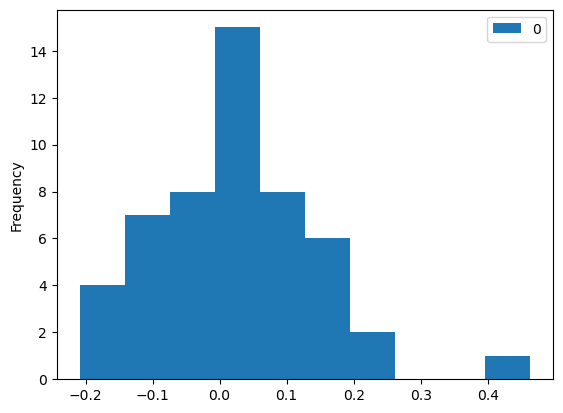

In [171]:
pd.DataFrame(cs_cap).plot(kind='hist')

In [172]:
#thus we capped out the outliers.
#Imputation

## 3.) MICE Imputation
*->Multiple Imputations by Chained Equations* <br>

*In the imputation methodology,<br>
-->we are actually make the outliers as Nan & try to interpolate or predict the values by ML techniques<br>
-->We can impute by either interpolation technique or KNNImputer or MICE* 
<br>
<br>
*In MICE,<br>
-->We first assign a temporary imputations to the missing values(mean,mdeian,mode.. depending upon values) after that<br>
-->we may decide the iterator, which continuosly try to predict & impute missing data point which the help of others*
<br>
Why chained equations? <br>
*-->Since we continuously (iteretively) assign a temporary imputation & try to fit (impute) by Model ,
<br> Thus the finaly result will be imputation of last chain eqn* br>

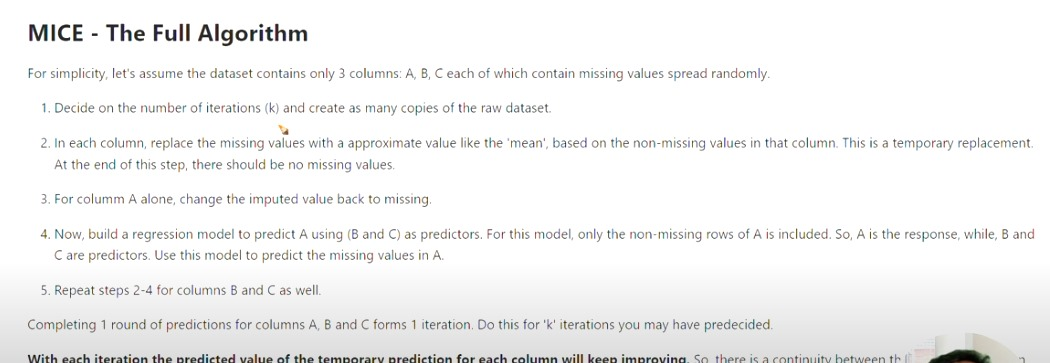
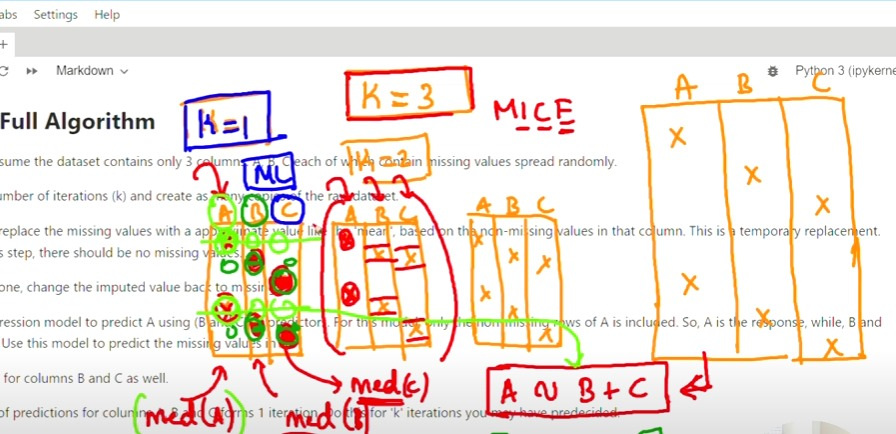




In [182]:
cs['value'] = cs['value'].apply(lambda x : np.nan if x>at95p or x<at5p else x)

In [198]:
imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42),random_state=42)

In [199]:
imputer.fit(cs.drop('z_score',axis=1))

IterativeImputer(estimator=RandomForestRegressor(random_state=42),
                 random_state=42)

In [200]:
imp_cs = imputer.transform(cs.drop('z_score',axis=1))

<Axes: ylabel='Frequency'>

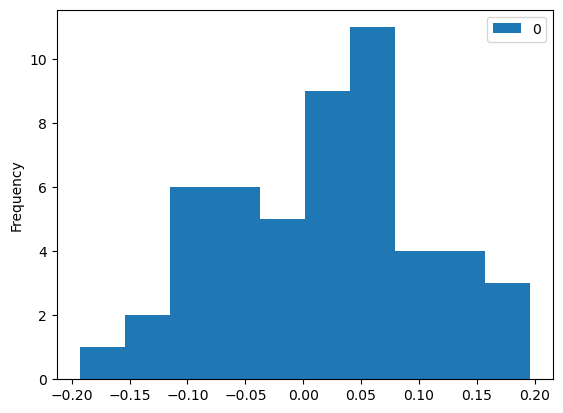

In [201]:
pd.DataFrame(imp_cs[:,1]).plot(kind='hist')

In [196]:
#Thus we perfectly get rid of outliers ! 😊

## 3.) Box Plots & IQR
*another best univariate method for outliers* <br>
*--> More similar to the z_score analysis <br>
--> One xtra cons is here we can visually intrepret the outliers outside the range of distribution <br>
i.e points which are lie outside the range of (Q1-1.5*IQR,Q3+1.5*IQR)<br>
-> IQR (50%) -> Median of distribution<br>
-> Q1 (25%)-> Median of 1st half<br>
-> Q3 (75%) -> Median of 2nd half<br>

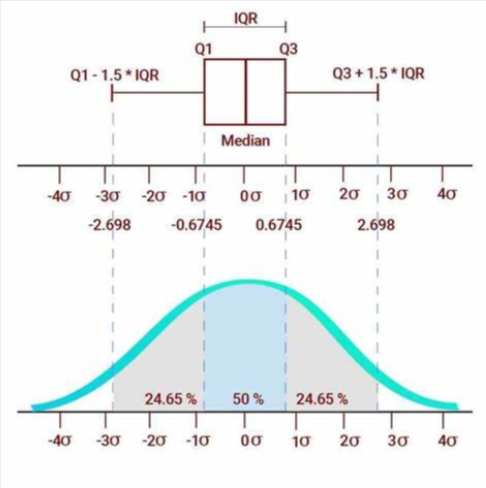


In [202]:
# let's load employee salary dataset

emp = pd.read_csv(r"C:\Users\navab\Downloads\Employee_Salaries.csv")

In [205]:
emp.head(4)

,Department,Department_Division,PCN,Position_Title,FLSA_Status,Initial_Hire_Date,Date_in_Title,Salary
0,AGR,AGR 001 Directors Office,B.001326.1,Administrative Specialist II,Non Exempt,9/10/1984,3/1/2018,59947.94
1,AGR,AGR 001 Directors Office,B.003590,Rural Community Coordinator,Exempt,8/16/2003,12/7/2016,85765.16
2,AGR,AGR 001 Directors Office,B.004807,Director of Agriculture,Exempt,10/1/2008,10/1/2008,137517.91
3,AGR,AGR 010 Cooperative Extension Program,B.001801.1,Administrative Assistant,Non Exempt,2/1/2011,3/14/2019,38745.46


In [207]:
emp.dtypes

Department              object
Department_Division     object
PCN                     object
Position_Title          object
FLSA_Status             object
Initial_Hire_Date       object
Date_in_Title           object
Salary                 float64
dtype: object

<Axes: >

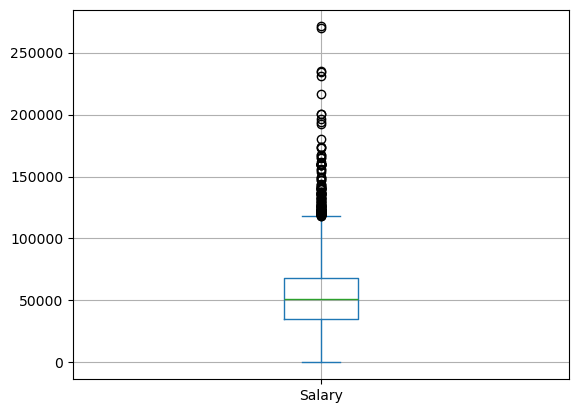

In [213]:
emp['Salary'].plot(kind='box',grid=True)

In [217]:
#salary discrepancy!
#you can see the distribution is more often right skewed, there are some depts who were potentially earn salaries more than normal ones..(norm dist) 

<Axes: xlabel='Salary'>

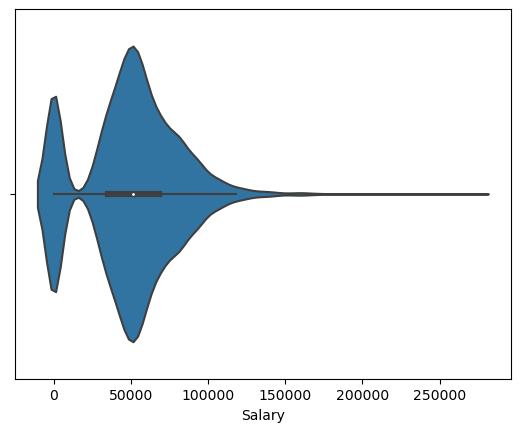

In [216]:
sns.violinplot(data=emp,x='Salary')

In [218]:
emp['Salary'].describe()

count      6946.000000
mean      50311.956067
std       30931.208983
min           0.000000
25%       35324.120000
50%       51198.680000
75%       68386.825000
max      271004.500000
Name: Salary, dtype: float64

In [219]:
q1 = emp['Salary'].quantile(0.25)
iqr = emp['Salary'].quantile(0.5)
q3 = emp['Salary'].quantile(0.75)

<Axes: >

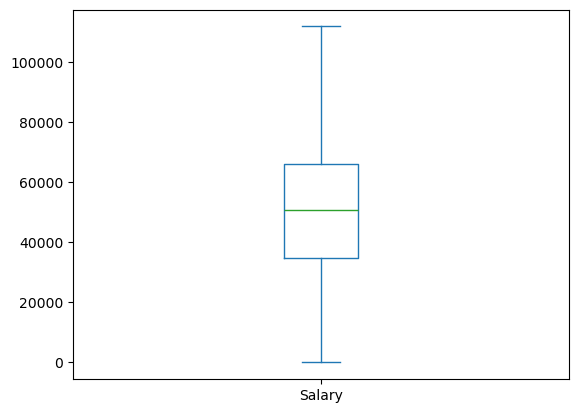

In [239]:
emp[(emp['Salary']> q1-1.5*iqr) & (emp['Salary']< q3+iqr*0.85)].plot(kind='box')

In [241]:
emp[(emp['Salary'] <q1-1.5*iqr) | (emp['Salary']>q3+iqr*1.5)]['Salary'].head(5)

18    159823.81
32    159636.63
37    159636.63
39    159636.63
48    234273.00
Name: Salary, dtype: float64

<Axes: ylabel='Frequency'>

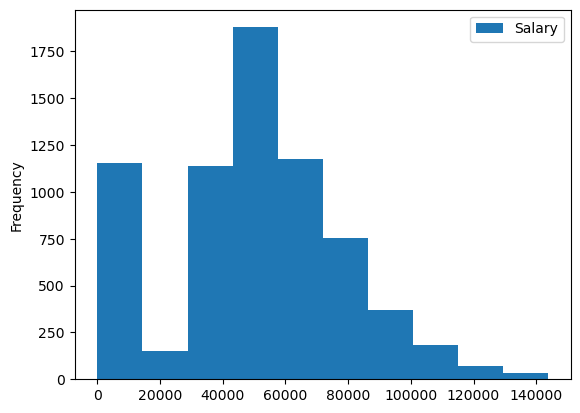

In [243]:
emp[(emp['Salary']> q1-1.5*iqr) & (emp['Salary']< q3+iqr*1.5)].plot(kind='hist')

--------------------------------------------------------------------------------------------

## 4.) Cook's Distance :
*The very most important statistic to find the most influential points in the regression analysis <br>*
**The influential points are the ones which potentially cause the assumption regard to modelling (best fit)** <br>
(or)<br>
*the points which carry the high error*


**Cook's Distance** <br>
\$\$
D_i = \frac{\sum_{j=1}^n (\hat{y}j - \hat{y}{j(i)})^2}{p \cdot MSE}
\$\$
*Here the algorithm of cook's distance to fit the model for every records in the data in sense to find which the find the variation or changes of regression co efficients corresponds for leaving that data point*
<br>
**cook's dis** directly proportional to the **impact on reg score** <br>
if cook > 1 , then the data point is **highly substantial to be analysed** <br>
if < 1 , not the big impact!


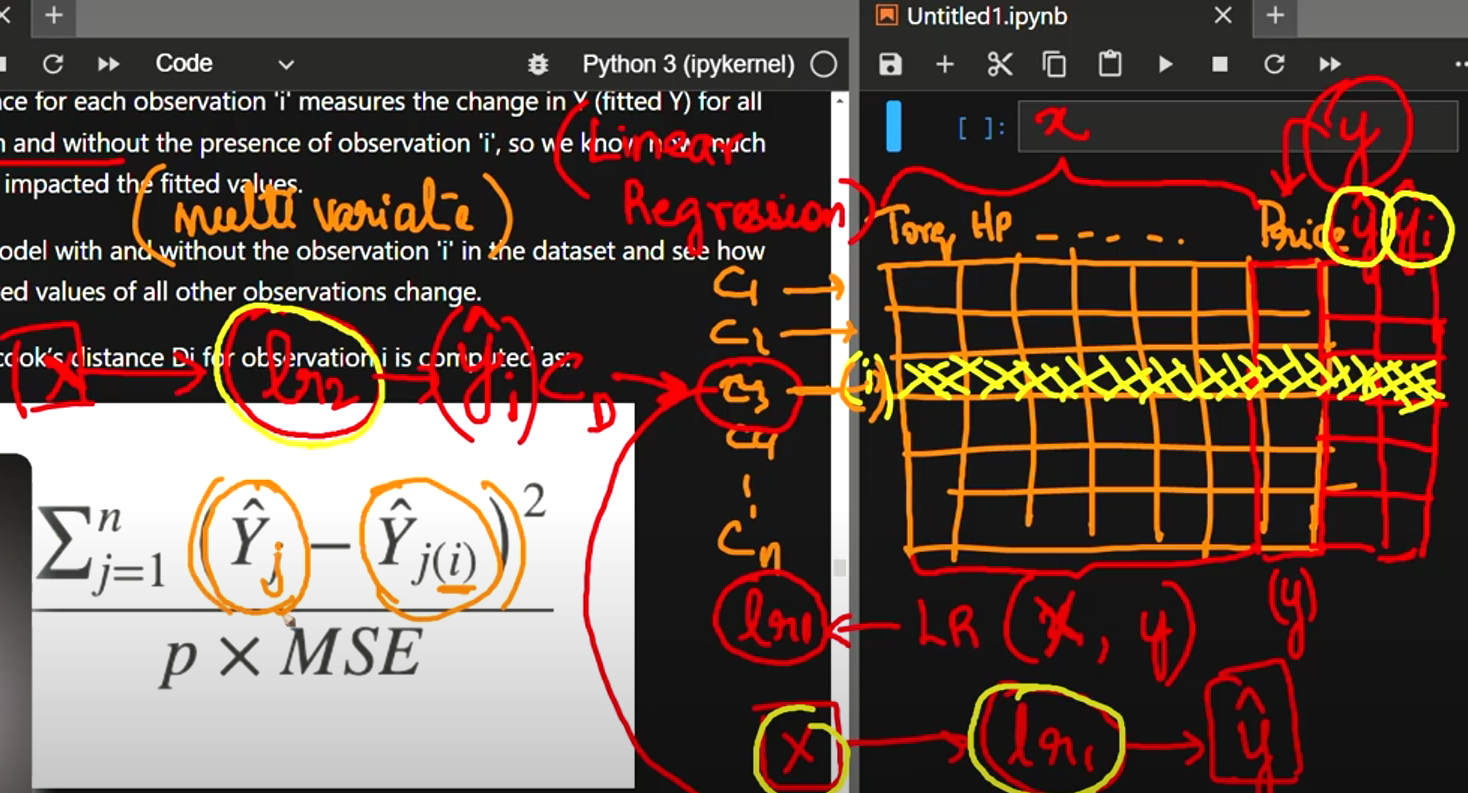


In [444]:
#loading the data
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
car = pd.read_csv(filename, names = headers)
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [445]:
car.replace('?',np.nan,inplace=True)
car.dropna(inplace=True)

In [446]:
car.reset_index(inplace=True)

In [279]:
x = df.select_dtypes(['int','float'])

In [271]:
y = df['price'].astype('float')

In [280]:
x = sm.add_constant(x)

In [281]:
mod = sm.OLS(y,x).fit()

In [282]:
influence = mod.get_influence()


In [308]:
cooks = influence.cooks_distance[0]


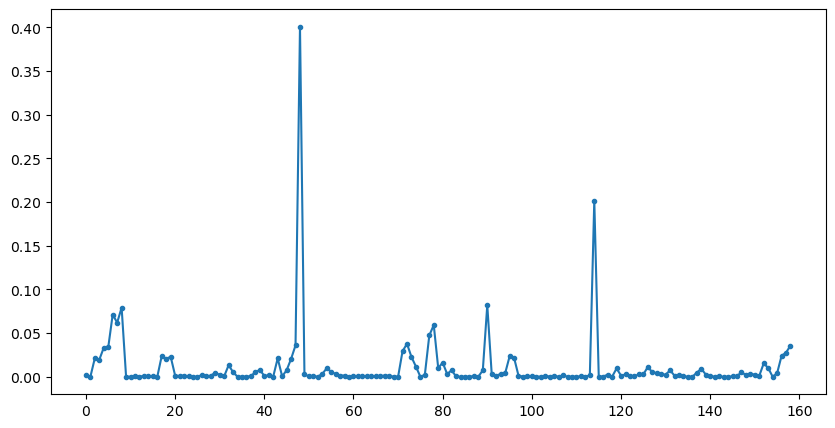

In [298]:
plt.figure(figsize=(10,5))
plt.plot(x.index,cooks,marker='.')

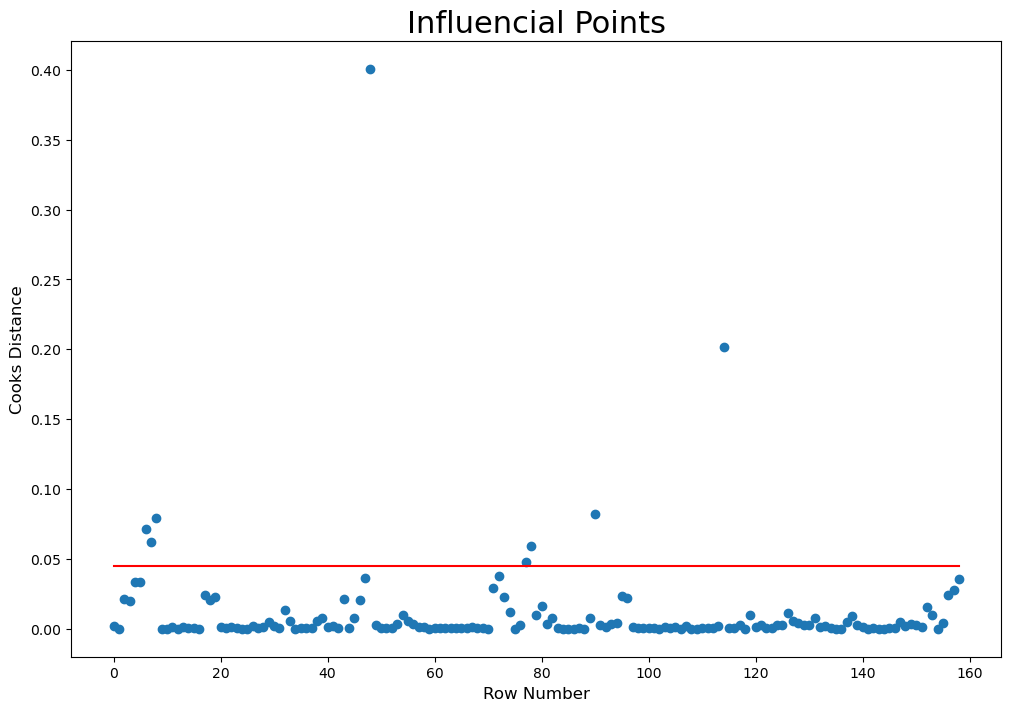

In [302]:
mean_cooks = np.mean(cooks)
mean_cooks_list = [4*mean_cooks for i in x.index]
plt.figure(figsize = (12, 8))
plt.scatter(x.index, cooks)
plt.plot(x.index, mean_cooks_list, color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

In [307]:
#The most influential data point is ,
x[cooks > 0.3]

,const,index,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
48,1.0,72,3,96.6,180.3,70.5,50.8,3685,234,8.3,16,18


In [303]:
#that's all we succesfully found out the influential points of the regresion model

-------------------------------------------------------------------------------------------------------------------

## 3.) Mahalanobis Distance

*Mahalanobis distance is yet another a popular distance metric to segregate the abnormal points from a distribution*<br>
from Euclidean distance, it won't capture the relation of point in a distribution rather than it simply calucultes the distance between a point to point.<br>
Here to identify a outier, Mahalanobis distance has modified distance metric which captures the distance between a point and a distribution<br>
-->It acheives by a inverse covariance matric,<br>
--where the covariance matrix captures the spread of variables along the data<br>
--The inverse of the covariance matrix normalizes the covariance matrix.i.e) inverse , that is the variables those are having high correlation are transformed <br>into unit variance (lower values(variance) and the points those are having lower variance are transformed to higher values <br>
The reason for including the **inverse** covariance matrix is to **avoid segregating a point within a distribution even if it has a larger distance**
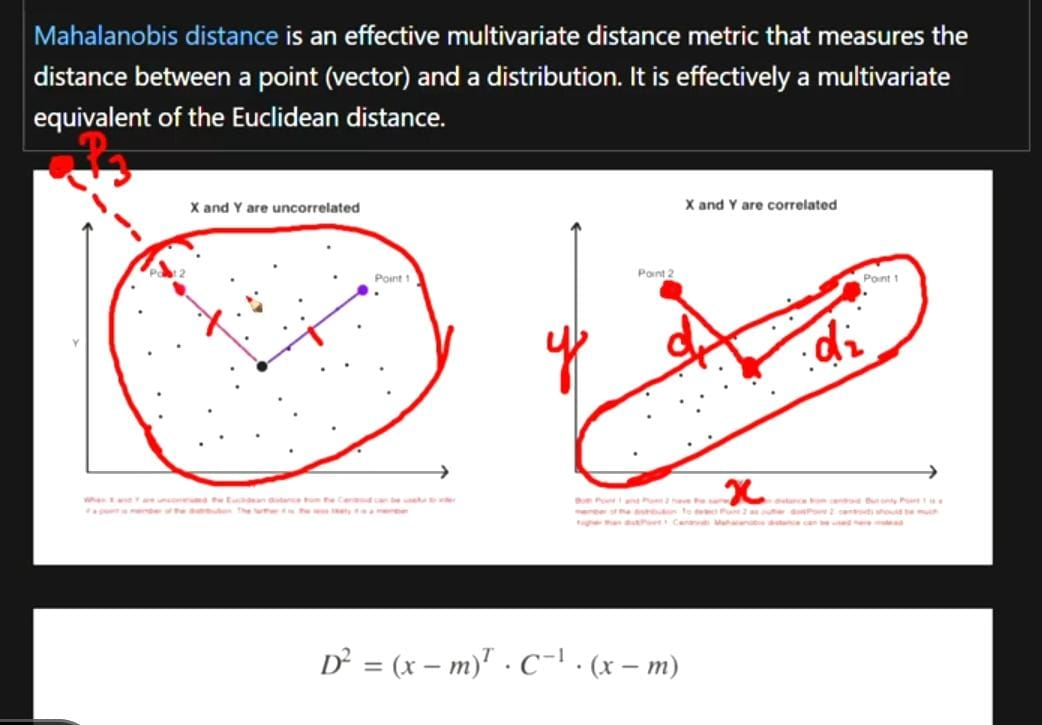


In [493]:
#loading previos car dataset
df = car.copy()
x = df.select_dtypes(['int','float'])
x.shape

(159, 11)

In [472]:
data = x.copy()
df = x.copy()

# Calculate the mean vector
mean_vector = np.mean(df, axis=0)  # (11,)

# Calculate the covariance matrix
cov_matrix = np.cov(df, rowvar=False)  # (11, 11)

# Compute the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)  # (11,11)

# Define the Mahalanobis distance function
def mahalanobis(x):
    centered_x = x - mean_vector  # (11,)
    mahalanobis_dist = np.dot(centered_x, np.dot(inv_cov_matrix, centered_x.T))  # (1,)
    return mahalanobis_dist

# Apply the Mahalanobis distance function to each row in the DataFrame
df['mahalanobis'] = df.apply(lambda row: mahalanobis(row), axis=1) # axis =1 is to apply the fun at each rows (obs)



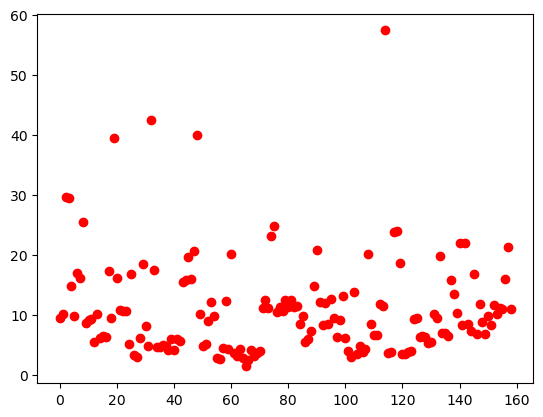

In [477]:
plt.scatter(df.index,df.mahalanobis,color='red')

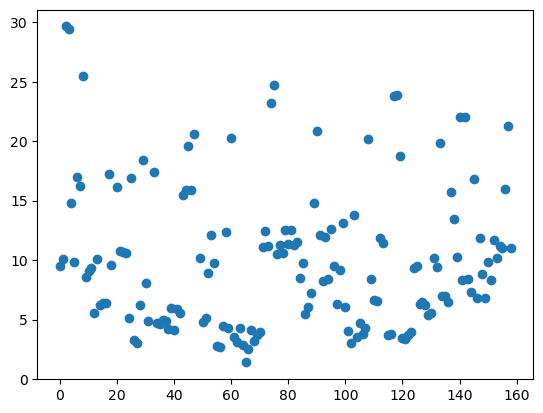

In [492]:
#segregating the outliers
seg = df[df.mahalanobis<39][['mahalanobis']]
plt.scatter(seg.index,seg['mahalanobis'])

In [ ]:
#Thus we have been seen various of finding & solving the ouliers itself in this notebook ❤️🤞.

### Thank You !
--Abubacker S